# **Applied Machine Learning Homework 5**
**Due 02 Dec 2023 (Tuesday) 11:59PM EST**

Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).

2) Please include your Name and UNI below.

## Name : Kaiyan Xu

## UNI : kx2198

## Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [28]:
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

170498071/170498071 [==============================] - 3s 0us/step
x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


3.1 We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:
1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!

6) A fully connected layer with 84 units, ReLU activation

7) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [30]:
#Your code here
cnn = Sequential()
cnn.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

3.2 Report the model summary

In [31]:
#Your code here
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 6)         0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)              

###3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [34]:
#Your code here
from tensorflow.keras.optimizers import Adam

cnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn.fit(X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val)
    )

Epoch 1/20
1250/1250 [==============================] - 61s 48ms/step - loss: 1.6357 - accuracy: 0.3986 - val_loss: 1.4265 - val_accuracy: 0.4781
Epoch 2/20
1250/1250 [==============================] - 72s 57ms/step - loss: 1.3579 - accuracy: 0.5105 - val_loss: 1.3360 - val_accuracy: 0.5262
Epoch 3/20
1250/1250 [==============================] - 50s 40ms/step - loss: 1.2229 - accuracy: 0.5639 - val_loss: 1.1853 - val_accuracy: 0.5793
Epoch 4/20
1250/1250 [==============================] - 52s 42ms/step - loss: 1.1259 - accuracy: 0.6007 - val_loss: 1.1613 - val_accuracy: 0.5892
Epoch 5/20
1250/1250 [==============================] - 64s 51ms/step - loss: 1.0526 - accuracy: 0.6270 - val_loss: 1.1481 - val_accuracy: 0.5963
Epoch 6/20
1250/1250 [==============================] - 55s 44ms/step - loss: 0.9910 - accuracy: 0.6529 - val_loss: 1.0728 - val_accuracy: 0.6242
Epoch 7/20
1250/1250 [==============================] - 49s 39ms/step - loss: 0.9328 - accuracy: 0.6678 - val_loss: 1.1041 -

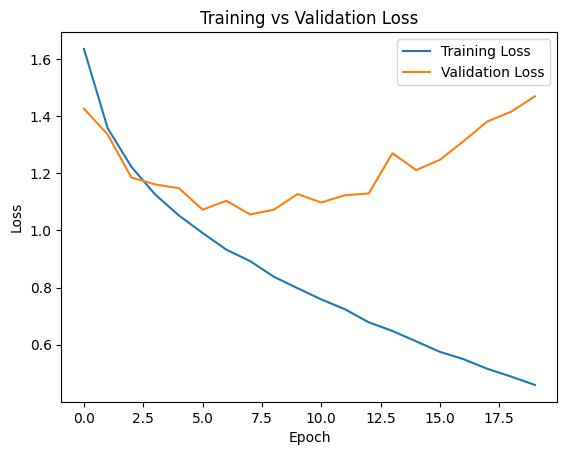

In [36]:
#Your code here
import matplotlib.pyplot as plt

hist = pd.DataFrame(history_cnn.history)
fig, ax = plt.subplots()
ax.plot(hist.index, hist["loss"], label = 'Training Loss')
ax.plot(hist.index, hist["val_loss"], label = 'Validation Loss')
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
ax.legend()
ax.set_title("Training vs Validation Loss")
plt.show()

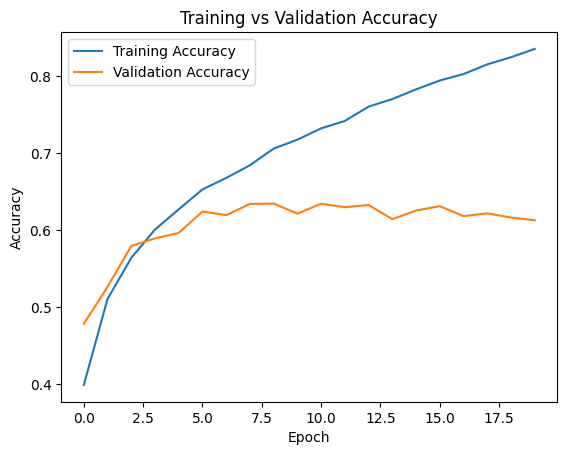

In [37]:
#Your code here
hist = pd.DataFrame(history_cnn.history)
fig, ax = plt.subplots()
ax.plot(hist.index, hist["accuracy"], label = 'Training Accuracy')
ax.plot(hist.index, hist["val_accuracy"], label = 'Validation Accuracy')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epoch")
ax.legend()
ax.set_title("Training vs Validation Accuracy")
plt.show()

In [38]:
#Your code here
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 4s 13ms/step - loss: 1.5145 - accuracy: 0.6045
Test Loss: 1.514481782913208
Test Accuracy: 0.6044999957084656


3.4 Overfitting

1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

displaying train vs validation loss over each epoch
displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

displaying train vs validation loss over each epoch
displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

3.4.1 Dropout

In [50]:
#Your code here
from tensorflow.keras.layers import Dropout

cnn_dropout = Sequential()
cnn_dropout.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn_dropout.add(MaxPool2D(pool_size=(2, 2)))
cnn_dropout.add(Dropout(0.3))
cnn_dropout.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
cnn_dropout.add(MaxPool2D(pool_size=(2, 2)))
cnn_dropout.add(Dropout(0.3))
cnn_dropout.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))
cnn_dropout.add(Flatten())
cnn_dropout.add(Dense(84, activation='relu'))
cnn_dropout.add(Dropout(0.3))
cnn_dropout.add(Dense(10, activation='softmax'))

In [51]:
#Your code here
cnn_dropout.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn_dropout = cnn_dropout.fit(X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val)
    )

Epoch 1/20
1250/1250 [==============================] - 54s 43ms/step - loss: 1.7975 - accuracy: 0.3406 - val_loss: 1.5104 - val_accuracy: 0.4573
Epoch 2/20
1250/1250 [==============================] - 54s 43ms/step - loss: 1.5141 - accuracy: 0.4539 - val_loss: 1.3485 - val_accuracy: 0.5115
Epoch 3/20
1250/1250 [==============================] - 52s 41ms/step - loss: 1.4196 - accuracy: 0.4911 - val_loss: 1.2750 - val_accuracy: 0.5381
Epoch 4/20
1250/1250 [==============================] - 59s 47ms/step - loss: 1.3648 - accuracy: 0.5138 - val_loss: 1.2994 - val_accuracy: 0.5244
Epoch 5/20
1250/1250 [==============================] - 64s 51ms/step - loss: 1.3182 - accuracy: 0.5313 - val_loss: 1.2057 - val_accuracy: 0.5632
Epoch 6/20
1250/1250 [==============================] - 55s 44ms/step - loss: 1.2749 - accuracy: 0.5454 - val_loss: 1.1747 - val_accuracy: 0.5832
Epoch 7/20
1250/1250 [==============================] - 54s 43ms/step - loss: 1.2419 - accuracy: 0.5579 - val_loss: 1.1663 -

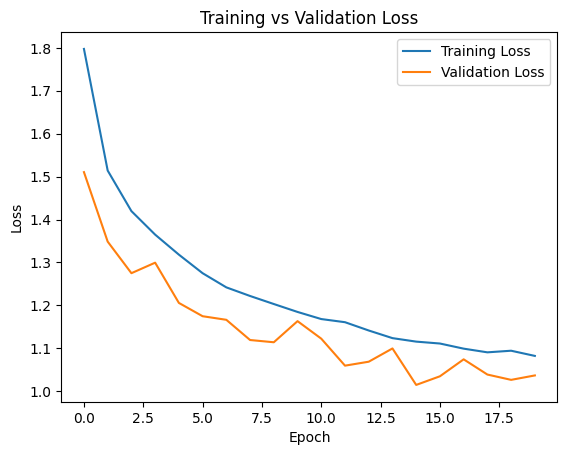

In [52]:
#Your code here
hist_dropout = pd.DataFrame(history_cnn_dropout.history)
fig, ax = plt.subplots()
ax.plot(hist_dropout.index, hist_dropout["loss"], label = 'Training Loss')
ax.plot(hist_dropout.index, hist_dropout["val_loss"], label = 'Validation Loss')
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
ax.legend()
ax.set_title("Training vs Validation Loss")
plt.show()

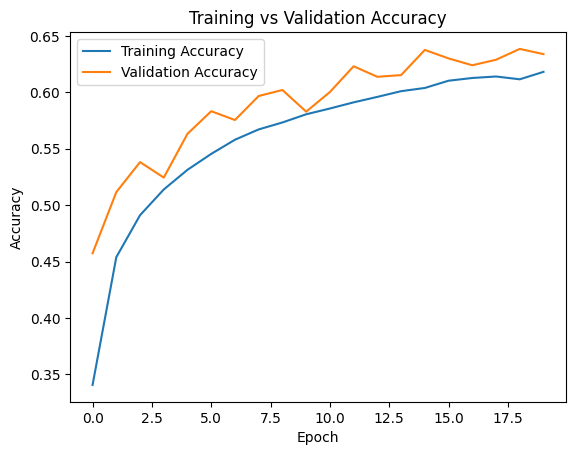

In [53]:
hist_dropout = pd.DataFrame(history_cnn_dropout.history)
fig, ax = plt.subplots()
ax.plot(hist_dropout.index, hist_dropout["accuracy"], label = 'Training Accuracy')
ax.plot(hist_dropout.index, hist_dropout["val_accuracy"], label = 'Validation Accuracy')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epoch")
ax.legend()
ax.set_title("Training vs Validation Accuracy")
plt.show()

In [54]:
test_loss_dropout, test_accuracy_dropout = cnn_dropout.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss_dropout}")
print(f"Test Accuracy: {test_accuracy_dropout}")

313/313 [==============================] - 4s 13ms/step - loss: 1.0607 - accuracy: 0.6279
Test Loss: 1.0606769323349
Test Accuracy: 0.6279000043869019


3.4.2 Batch Normalisation

In [45]:
#Your code here
from tensorflow.keras.layers import BatchNormalization

cnn_BN = Sequential()
cnn_BN.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn_BN.add(BatchNormalization())
cnn_BN.add(MaxPool2D(pool_size=(2, 2)))
cnn_BN.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
cnn_BN.add(BatchNormalization())
cnn_BN.add(MaxPool2D(pool_size=(2, 2)))
cnn_BN.add(Conv2D(120, kernel_size=(5, 5), activation='relu'))
cnn_BN.add(BatchNormalization())
cnn_BN.add(Flatten())
cnn_BN.add(Dense(84, activation='relu'))
cnn_BN.add(BatchNormalization())
cnn_BN.add(Dense(10, activation='softmax'))

In [46]:
#Your code here
cnn_BN.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn_BN = cnn_BN.fit(X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val)
    )

Epoch 1/20
1250/1250 [==============================] - 66s 51ms/step - loss: 1.5479 - accuracy: 0.4503 - val_loss: 1.3224 - val_accuracy: 0.5247
Epoch 2/20
1250/1250 [==============================] - 64s 51ms/step - loss: 1.2220 - accuracy: 0.5667 - val_loss: 1.2152 - val_accuracy: 0.5708
Epoch 3/20
1250/1250 [==============================] - 67s 54ms/step - loss: 1.0826 - accuracy: 0.6188 - val_loss: 1.1623 - val_accuracy: 0.5957
Epoch 4/20
1250/1250 [==============================] - 63s 51ms/step - loss: 0.9885 - accuracy: 0.6530 - val_loss: 1.2358 - val_accuracy: 0.5759
Epoch 5/20
1250/1250 [==============================] - 62s 50ms/step - loss: 0.9089 - accuracy: 0.6807 - val_loss: 1.0196 - val_accuracy: 0.6470
Epoch 6/20
1250/1250 [==============================] - 63s 51ms/step - loss: 0.8407 - accuracy: 0.7045 - val_loss: 1.1459 - val_accuracy: 0.6122
Epoch 7/20
1250/1250 [==============================] - 67s 54ms/step - loss: 0.7794 - accuracy: 0.7252 - val_loss: 1.0392 -

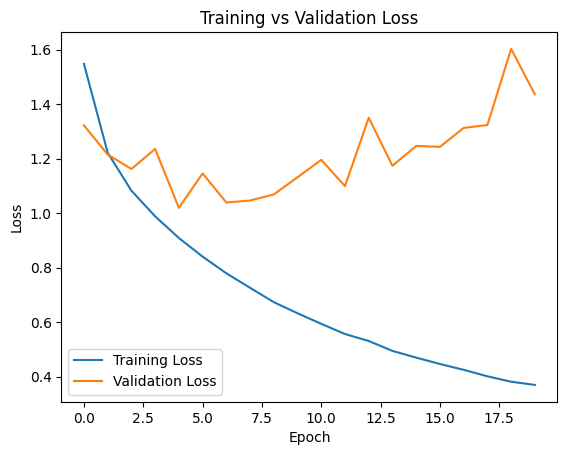

In [47]:
#Your code here
hist_BN = pd.DataFrame(history_cnn_BN.history)
fig, ax = plt.subplots()
ax.plot(hist_BN.index, hist_BN["loss"], label = 'Training Loss')
ax.plot(hist_BN.index, hist_BN["val_loss"], label = 'Validation Loss')
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
ax.legend()
ax.set_title("Training vs Validation Loss")
plt.show()

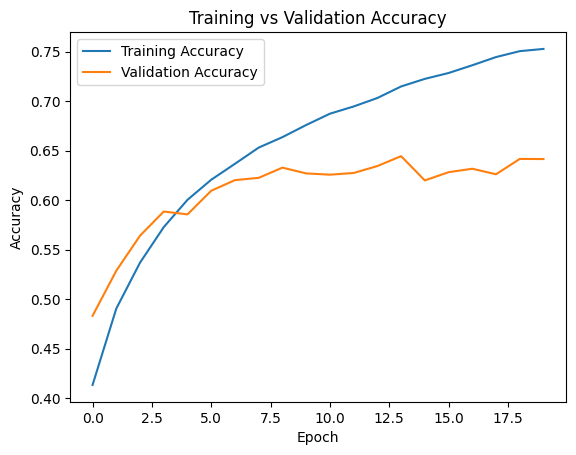

In [48]:
hist_BN = pd.DataFrame(history_cnn_dropout.history)
fig, ax = plt.subplots()
ax.plot(hist_BN.index, hist_BN["accuracy"], label = 'Training Accuracy')
ax.plot(hist_BN.index, hist_BN["val_accuracy"], label = 'Validation Accuracy')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epoch")
ax.legend()
ax.set_title("Training vs Validation Accuracy")
plt.show()

In [49]:
test_loss_BN, test_accuracy_BN = cnn_BN.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss_BN}")
print(f"Test Accuracy: {test_accuracy_BN}")

313/313 [==============================] - 5s 17ms/step - loss: 1.4563 - accuracy: 0.6258
Test Loss: 1.456310510635376
Test Accuracy: 0.6258000135421753


Batch normalization has lower loss and higher accuracy compared to original model, but higher loss and lower accuracy compared to dropout. From the result, dropout is probably a better technique as it has lowest loss and highest accuracy. Since loss is still decreasing at epoch 20, it is not overfitting yet and it is likely to perform even better with higher epoch.

## Natural Language Processing

We will train a supervised learning model to predict if a movie review has a positive or negative sentiment.

###**Dataset loading & dev/test splits**

1.1) Load the movie reviews dataset from NLTK library

In [1]:
import nltk
nltk.download("movie_reviews")
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import movie_reviews
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1.2) Load the positive & negative reviews

In [2]:
positive_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.raw(fileid)
    positive_reviews.append(words)

negative_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.raw(fileid)
    negative_reviews.append(words)

1.3) Make a data frame that has all reviews and their corresponding labels

In [3]:
# Your code here
import pandas as pd

positive_labels = ['positive'] * len(positive_reviews)
negative_labels = ['negative'] * len(negative_reviews)

total_reviews = positive_reviews + negative_reviews
total_labels = positive_labels + negative_labels

df = pd.DataFrame({
    'review': total_reviews,
    'label': total_labels
})

print(df.head())

                                              review     label
0  films adapted from comic books have had plenty...  positive
1  every now and then a movie comes along from a ...  positive
2  you've got mail works alot better than it dese...  positive
3   " jaws " is a rare film that grabs your atten...  positive
4  moviemaking is a lot like being the general ma...  positive


1.4) Look at the class distribution of the movie reviews

In [4]:
# Your code here
df['label'].value_counts()

positive    1000
negative    1000
Name: label, dtype: int64

1.5) Create a development & test split (80/20 ratio):

In [5]:
# Your code here
reviews = list(df.review)
sentiment = df.label
dev_text, test_text, dev_y, test_y = train_test_split(reviews, sentiment, test_size = 0.2, random_state = 42)

## **Data preprocessing**

We will do some data preprocessing before we tokenize the data. You can use the re package in python to remove and and replace these strings.

1.6) Replace numbers in every review with ""

In [6]:
# Your code here
dev_text = [re.sub(r'\d+', '', review) for review in dev_text]
test_text = [re.sub(r'\d+', '', review) for review in test_text]

1.7) Remove all stop words

In [7]:
# Your code here
def remove_stop_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop]
    return ' '.join(filtered_words)

dev_text = [remove_stop_words(review) for review in dev_text]
test_text = [remove_stop_words(review) for review in test_text]

1.8) Remove all punctuations

In [8]:
# Your code here
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

dev_text = [remove_punctuation(review) for review in dev_text]
test_text = [remove_punctuation(review) for review in test_text]

1.9) Apply stemming on the development & test datasets using Porter algorithm

In [10]:
# Your code here
def stemSentence(sentence):
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)
porter = PorterStemmer()
dev_text = [stemSentence(review) for review in dev_text]
test_text = [stemSentence(review) for review in test_text]

1.10) Looking at the dataset do you think any other data pre-processing might be helpful? You can experiment with the features if you want to.

In [11]:
dev_text[0]

'insan inspir music alferd packer first man ever tri cannib america stori unfold learn event led packer trey parker supposedli kill eat five men got lost accompani mountain colorado search gold throughout packer must contend evil trapper bent steal prize hors tribe ute indian nt seem quit mark terribl winter storm lead eventu cannib parker obvious know music well viewer also treat maddeningli catchi song appear film would accomplish postcannib music motion pictur south park bigger longer uncut apart inher interest see pre south park parker stone first effort cannib also offer pretti decent laugh aforement ute indian tribe packer s group encount definit highlight two rous music number snowmen one end comed deadli note stone s humphrey charact steal show especi complain prospect eat butt reveal s underneath muff cap jason mchugh s charact mr miller stand perform though offer hilari dissent voic proceed mention parker s song catchi ll hard press get s shpadoinkl day head ve heard incident

Create N-grams can be helpful because it can reflect the sentiment more accurately by considering the context in the review.

### 2) Model Training

2.1) Create bag of words features for each review in the development dataset

In [16]:
# Your code here
vector = CountVectorizer()
dev_X = vector.fit_transform(dev_text)
test_X = vector.transform(test_text)

2.2) Train a Logistic Regression model on the development dataset

In [22]:
# Your code here
lr = LogisticRegression().fit(dev_X, dev_y)
lr.score(test_X, test_y)

0.815

2.3) Create TF-IDF features for each review in the development dataset

In [20]:
# Your code here
vector_tfidf = TfidfVectorizer()
dev_X_tfidf = vector_tfidf.fit_transform(dev_text)
test_X_tfidf = vector_tfidf.transform(test_text)

2.4) Train the Logistic Regression model on the development dataset with TF-IDF features

In [26]:
# Your code here
lr_tfidf = LogisticRegression().fit(dev_X_tfidf, dev_y)
lr_tfidf.score(test_X_tfidf, test_y)

0.825

2.5) Compare the performance of the two models on the test dataset using a classication
report and the scores obtained. Explain the difference in results obtained.

In [25]:
# Your code here
pred_y = lr_tfidf.predict(test_X)
report = classification_report(test_y, pred_y)
print('Bag of Words: ')
print(report)

pred_y_tfidf = lr_tfidf.predict(test_X_tfidf)
report_tfidf = classification_report(test_y, pred_y_tfidf)
print('TF-IDF: ')
print(report_tfidf)

Bag of Words: 
              precision    recall  f1-score   support

    negative       0.78      0.83      0.80       201
    positive       0.82      0.76      0.79       199

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.80      0.79       400

TF-IDF: 
              precision    recall  f1-score   support

    negative       0.83      0.82      0.82       201
    positive       0.82      0.83      0.83       199

    accuracy                           0.82       400
   macro avg       0.83      0.83      0.82       400
weighted avg       0.83      0.82      0.82       400



TF-IDF has higher accuracy, recall, and F1-score than the default bag of words. That is because TF-IDF consider number of times a word appear in different documents, and the word is treated less important if it appears in more documents. Therefore, it is generally a better representation of text.